**K-Mode Clustering on Banking dataset**

In [5]:
# supress warnings
import warnings
warnings.filterwarnings('ignore')

# Importing all required packages
import numpy as np
import pandas as pd

# Data viz lib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from matplotlib.pyplot import xticks

Data Reading and Understanding

In [6]:
bank = pd.read_csv('bankmarketing.csv')

In [7]:
bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [8]:
bank.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [9]:
# Importing Categorical Columns

bank_cust = bank[['age','job', 'marital', 'education', 'default', 'housing', 'loan','contact','month','day_of_week','poutcome']]

In [10]:
bank_cust.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,nonexistent
2,37,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent
4,56,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent


In [11]:
# Converting age into categorical variable.

bank_cust['age_bin'] = pd.cut(bank_cust['age'], [0, 20, 30, 40, 50, 60, 70, 80, 90, 100], 
                              labels=['0-20', '20-30', '30-40', '40-50','50-60','60-70','70-80', '80-90','90-100'])
bank_cust  = bank_cust.drop('age',axis = 1)

In [12]:
bank_cust.head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,age_bin
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent,50-60
1,services,married,high.school,unknown,no,no,telephone,may,mon,nonexistent,50-60
2,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent,30-40
3,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent,30-40
4,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent,50-60


Data Inspection

In [13]:
bank_cust.shape

(17483, 11)

In [14]:
bank_cust.describe()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,age_bin
count,17483,17483,17483,17483,17483,17483,17483,17483,17483,17482,17483
unique,12,4,8,2,3,3,2,3,5,1,6
top,blue-collar,married,high.school,no,no,no,telephone,may,mon,nonexistent,30-40
freq,5177,11069,4261,12258,8776,14432,12915,7763,3619,17482,6802


In [15]:
bank_cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17483 entries, 0 to 17482
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   job          17483 non-null  object  
 1   marital      17483 non-null  object  
 2   education    17483 non-null  object  
 3   default      17483 non-null  object  
 4   housing      17483 non-null  object  
 5   loan         17483 non-null  object  
 6   contact      17483 non-null  object  
 7   month        17483 non-null  object  
 8   day_of_week  17483 non-null  object  
 9   poutcome     17482 non-null  object  
 10  age_bin      17483 non-null  category
dtypes: category(1), object(10)
memory usage: 1.4+ MB


Data Cleaning


In [16]:
# Checking Null values
bank_cust.isnull().sum()*100/bank_cust.shape[0]
# There are no NULL values in the dataset, hence it is clean.

job            0.00000
marital        0.00000
education      0.00000
default        0.00000
housing        0.00000
loan           0.00000
contact        0.00000
month          0.00000
day_of_week    0.00000
poutcome       0.00572
age_bin        0.00000
dtype: float64

In [17]:
# Data is clean.

Model Building

In [18]:
# First we will keep a copy of data
bank_cust_copy = bank_cust.copy()

Data Preparation

In [19]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
bank_cust = bank_cust.apply(le.fit_transform)
bank_cust.head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,age_bin
0,3,1,0,0,0,0,1,2,1,0,4
1,7,1,3,1,0,0,1,2,1,0,4
2,7,1,3,0,2,0,1,2,1,0,2
3,0,1,1,0,0,0,1,2,1,0,2
4,7,1,3,0,0,2,1,2,1,0,4


In [20]:
!pip install Kmodes

# Importing Libraries

from kmodes.kmodes import KModes

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [21]:
# Checking the count per category
job_df = pd.DataFrame(bank_cust['job'].value_counts())

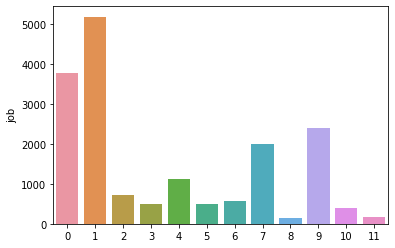

In [22]:
sns.barplot(x=job_df.index, y=job_df['job'])

In [23]:
# Checking the count per category
age_df = pd.DataFrame(bank_cust['age_bin'].value_counts())

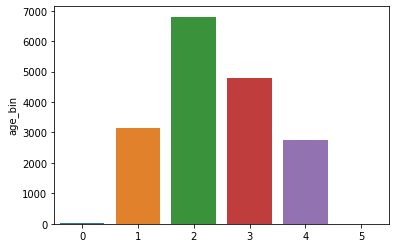

In [24]:
sns.barplot(x=age_df.index, y=age_df['age_bin'])

Using K-Mode with "Cao" initialization

In [25]:
km_cao = KModes(n_clusters=2, init = "Cao", n_init = 1, verbose=1)
fitClusters_cao = km_cao.fit_predict(bank_cust)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 1784, cost: 77725.0


In [26]:
# Predicted Clusters
fitClusters_cao

array([0, 0, 0, ..., 1, 0, 1], dtype=uint16)

In [27]:
clusterCentroidsDf = pd.DataFrame(km_cao.cluster_centroids_)
clusterCentroidsDf.columns = bank_cust.columns

In [28]:
# Mode of the clusters
clusterCentroidsDf

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,age_bin
0,1,1,3,0,0,0,1,2,1,0,2
1,0,2,6,0,2,0,0,0,0,0,3


Using K-Mode with "Huang" initialization

In [29]:
km_huang = KModes(n_clusters=2, init = "Huang", n_init = 1, verbose=1)
fitClusters_huang = km_huang.fit_predict(bank_cust)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 5031, cost: 77209.0
Run 1, iteration: 2/100, moves: 657, cost: 77209.0


In [30]:
# Predicted clusters
fitClusters_huang

array([0, 0, 0, ..., 1, 0, 1], dtype=uint16)

Choosing K by comparing Cost against each K



In [31]:
cost = []
for num_clusters in list(range(1,5)):
    kmode = KModes(n_clusters=num_clusters, init = "Cao", n_init = 1, verbose=1)
    kmode.fit_predict(bank_cust)
    cost.append(kmode.cost_)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 87759.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 1784, cost: 77725.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 1758, cost: 73171.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 2059, cost: 71813.0
Run 1, iteration: 2/100, moves: 888, cost: 71813.0


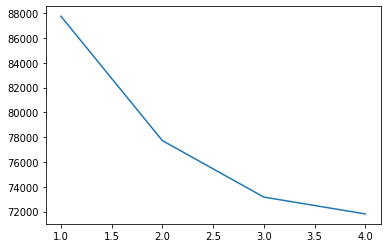

In [32]:
y = np.array([i for i in range(1,5,1)])
plt.plot(y,cost)

In [35]:
## Choosing K=2

In [33]:
km_cao = KModes(n_clusters=2, init = "Cao", n_init = 1, verbose=1)
fitClusters_cao = km_cao.fit_predict(bank_cust)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 1784, cost: 77725.0


In [34]:
fitClusters_cao

array([0, 0, 0, ..., 1, 0, 1], dtype=uint16)

Combining the predicted clusters with the original DF.




In [35]:
bank_cust = bank_cust.reset_index()
clustersDf = pd.DataFrame(fitClusters_cao)
clustersDf.columns = ['cluster_predicted']
combinedDf = pd.concat([bank_cust, clustersDf], axis = 1).reset_index()
combinedDf = combinedDf.drop(['index', 'level_0'], axis = 1)

In [36]:
combinedDf.head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,age_bin,cluster_predicted
0,3,1,0,0,0,0,1,2,1,0,4,0
1,7,1,3,1,0,0,1,2,1,0,4,0
2,7,1,3,0,2,0,1,2,1,0,2,0
3,0,1,1,0,0,0,1,2,1,0,2,0
4,7,1,3,0,0,2,1,2,1,0,4,0


Cluster Identification

In [37]:
# Data for Cluster1
cluster1 = combinedDf[combinedDf.cluster_predicted==1]

In [38]:
# Data for Cluster0
cluster0 = combinedDf[combinedDf.cluster_predicted==0]

In [39]:
cluster1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4405 entries, 140 to 17482
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   job                4405 non-null   int64 
 1   marital            4405 non-null   int64 
 2   education          4405 non-null   int64 
 3   default            4405 non-null   int64 
 4   housing            4405 non-null   int64 
 5   loan               4405 non-null   int64 
 6   contact            4405 non-null   int64 
 7   month              4405 non-null   int64 
 8   day_of_week        4405 non-null   int64 
 9   poutcome           4405 non-null   int64 
 10  age_bin            4405 non-null   int64 
 11  cluster_predicted  4405 non-null   uint16
dtypes: int64(11), uint16(1)
memory usage: 421.6 KB


In [40]:
cluster0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13078 entries, 0 to 17481
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   job                13078 non-null  int64 
 1   marital            13078 non-null  int64 
 2   education          13078 non-null  int64 
 3   default            13078 non-null  int64 
 4   housing            13078 non-null  int64 
 5   loan               13078 non-null  int64 
 6   contact            13078 non-null  int64 
 7   month              13078 non-null  int64 
 8   day_of_week        13078 non-null  int64 
 9   poutcome           13078 non-null  int64 
 10  age_bin            13078 non-null  int64 
 11  cluster_predicted  13078 non-null  uint16
dtypes: int64(11), uint16(1)
memory usage: 1.2 MB


In [41]:
# Checking the count per category for JOB
job1_df = pd.DataFrame(cluster1['job'].value_counts())
job0_df = pd.DataFrame(cluster0['job'].value_counts())

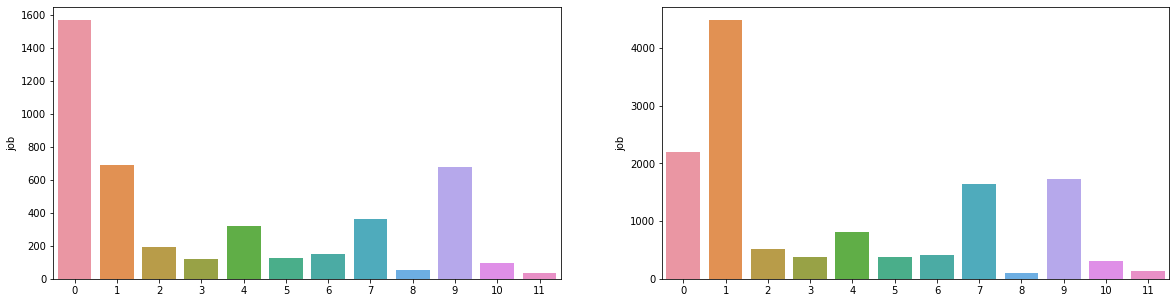

In [42]:
fig, ax =plt.subplots(1,2,figsize=(20,5))
sns.barplot(x=job1_df.index, y=job1_df['job'], ax=ax[0])
sns.barplot(x=job0_df.index, y=job0_df['job'], ax=ax[1])
fig.show()

In [43]:
age1_df = pd.DataFrame(cluster1['age_bin'].value_counts())
age0_df = pd.DataFrame(cluster0['age_bin'].value_counts())

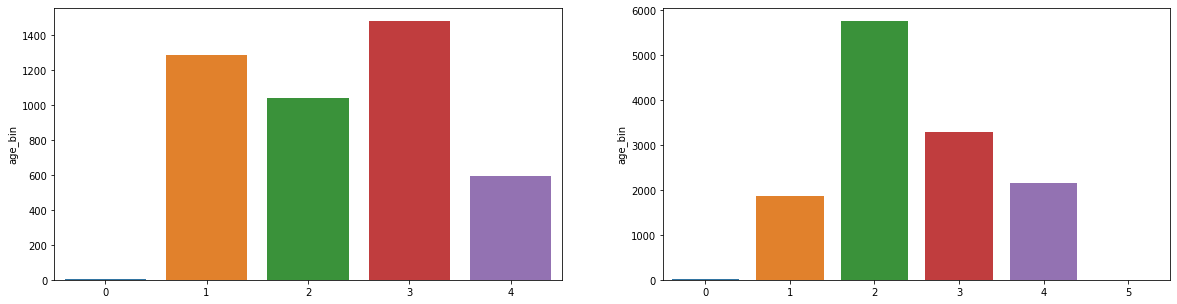

In [44]:
fig, ax =plt.subplots(1,2,figsize=(20,5))
sns.barplot(x=age1_df.index, y=age1_df['age_bin'], ax=ax[0])
sns.barplot(x=age0_df.index, y=age0_df['age_bin'], ax=ax[1])
fig.show()


In [45]:
print(cluster1['marital'].value_counts())
print(cluster0['marital'].value_counts())

2    2062
1    1671
0     665
3       7
Name: marital, dtype: int64
1    9398
2    2288
0    1367
3      25
Name: marital, dtype: int64


In [46]:
print(cluster1['education'].value_counts())
print(cluster0['education'].value_counts())

6    1707
3     832
2     630
5     478
0     335
1     214
7     207
4       2
Name: education, dtype: int64
3    3429
2    2566
6    2077
0    1823
5    1477
1    1054
7     648
4       4
Name: education, dtype: int64
